In [1]:
!pip install tensorflow


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
import matplotlib.pyplot as plt

In [3]:
# Adjust the path if needed
csv_path = "Shakespeare_data.csv"

# Load the CSV (assumes one column with Shakespeare text)
df = pd.read_csv(csv_path)
df_limited = df.head(1000)
# Show sample rows and infer the column name
print(df.head())

   Dataline      Play  PlayerLinenumber ActSceneLine         Player  \
0         1  Henry IV               NaN          NaN            NaN   
1         2  Henry IV               NaN          NaN            NaN   
2         3  Henry IV               NaN          NaN            NaN   
3         4  Henry IV               1.0        1.1.1  KING HENRY IV   
4         5  Henry IV               1.0        1.1.2  KING HENRY IV   

                                          PlayerLine  
0                                              ACT I  
1                       SCENE I. London. The palace.  
2  Enter KING HENRY, LORD JOHN OF LANCASTER, the ...  
3             So shaken as we are, so wan with care,  
4         Find we a time for frighted peace to pant,  


In [4]:
print("Columns:", df.columns)

Columns: Index(['Dataline', 'Play', 'PlayerLinenumber', 'ActSceneLine', 'Player',
       'PlayerLine'],
      dtype='object')


In [5]:
text = " ".join(df['PlayerLine'].dropna().astype(str))

print("Sample text:\n", text[:500])


Sample text:
 ACT I SCENE I. London. The palace. Enter KING HENRY, LORD JOHN OF LANCASTER, the EARL of WESTMORELAND, SIR WALTER BLUNT, and others So shaken as we are, so wan with care, Find we a time for frighted peace to pant, And breathe short-winded accents of new broils To be commenced in strands afar remote. No more the thirsty entrance of this soil Shall daub her lips with her own children's blood, Nor more shall trenching war channel her fields, Nor bruise her flowerets with the armed hoofs Of hostile 


In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1


In [7]:
# Use each player line directly
input_sequences = []

for line in df_limited['PlayerLine'].dropna().astype(str):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)


In [8]:
# Pad sequences
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

X = input_sequences[:, :-1]
y = tf.keras.utils.to_categorical(input_sequences[:, -1], num_classes=total_words)

In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_seq_len-1))
model.add(GRU(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


C:\Users\elist\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X, y, epochs=30, verbose=1) #90


Epoch 1/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 23s 108ms/step - accuracy: 0.8838 - loss: 0.3790
Epoch 2/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.8901 - loss: 0.3609
Epoch 3/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 23s 106ms/step - accuracy: 0.8900 - loss: 0.3559
Epoch 4/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.8858 - loss: 0.3660
Epoch 5/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.8818 - loss: 0.3863
Epoch 6/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.8980 - loss: 0.3370
Epoch 7/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8827 - loss: 0.3703
Epoch 8/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.8829 - loss: 0.3687
Epoch 9/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.8848 - loss: 0.3721
Epoch 10/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.8853 - loss: 0.3602
Epoch 11/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.8783 - loss: 0.3763
Epoch 12/30
213/213 ━━━━━

In [11]:
def generate_text(seed_text, next_words=30):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        output_word = tokenizer.index_word.get(np.argmax(predicted), '')
        seed_text += " " + output_word
    return seed_text

print(generate_text("To be or not to be", next_words=50))


To be or not to be saved by the earth i'll be a madcap too sleep if i hang a true man in the hollow bank westmoreland knights heady trembling seven reap'd worms boar's heady worms boar's crop pale douglas' house douglas' while unjointed nephew worms douglas' gallant deaths unjointed seven spear house departure poor poor


In [13]:
print(generate_text("will", next_words=100))

will easily be granted you my lord of york commends the plot and the world of honour's tongue to see me not not if thou art king with them puff and confine and talk'd unregister'd by the day form in the east envy shade unbutton nonce and be hanged two and francis razors poor poor poor forgeries barren puff woman conquest poor poor comparative most most fellow cousin gallant most house plague woman gallant gallant pair poor woman woman gallant horse gallant gallant gallant hill banish'd woman from thee lay weasel business true prince henry and poins should be the very


In [16]:
print(generate_text("will", next_words=100))

will hold at windsor so inform the lords an hour ago am true father sweet devil his due is not to a ground to all these knee gentlemen variation 'courage power poor poor of poor poor of poor poor malt worms of poor poor of poor knife poor of poor poor most poor of poor reap'd worms power close of nephew booty you mercy lend me thy house for frighted peace mercy lend me thy lantern business for with with with with sack with them and sends me word it to the proud king to foul these boast variation at much


In [18]:
print(generate_text("will", next_words=100))

will hold at windsor so inform the lords than to be bought an old lad of the hill of athol is two close with these valiant and knife variation palace variation palace palace palace barren blessed rather hours blessed brow buffets agents presence march thee belie me him mercy business harry i am accursed to rob the down trod mortimer runs part if all this the liege of york is by the poor land similes and art old faith for thee i hang ten ten vizards hazard poor jade agents i percy thirsty purpose palace presence march buffets noon thieves business


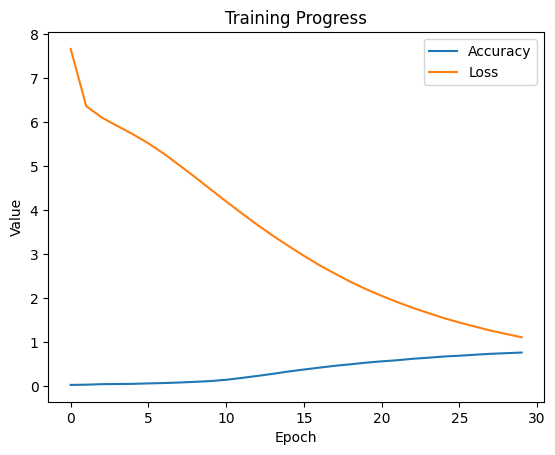

In [14]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


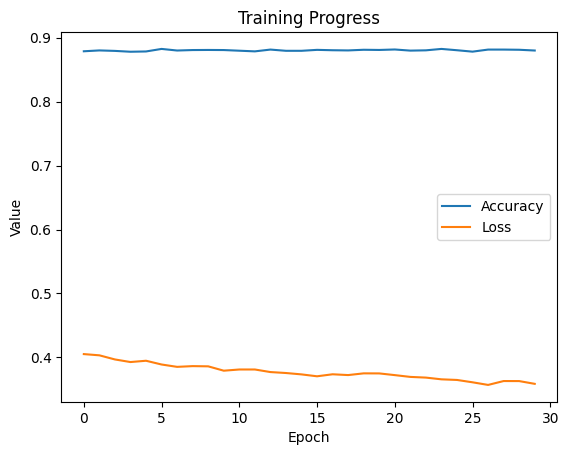

In [19]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()